In [1]:
%matplotlib inline

In [2]:
import json

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
from ggplot import *

In [5]:
!ls

bevolkingsdichtheidperwijk.csv	 fietsentelling_coupure.ipynb
bezettingparkeergarages2015.csv  fietstellingencoupure201105tot201208.csv
bezetting_parkings.ipynb	 wijkdichtheid_gent.ipynb
bomen_gent.ipynb		 Wijkmigratie.csv
bomeninventaris.json		 wijkmigratie_gent.png
dichtheid_gent.png		 wijkmigratie_in_beeld.ipynb


In [6]:
with open('bomeninventaris.json') as data_file:    
    data = json.load(data_file)

Extract the information from the json-file

In [7]:
bomen = []
for boom in data['Document']['Folder']['Placemark']:
    dezeboom = {}
    dezeboom['xcoordinate'] = float(boom['Point']['coordinates']['@text'].split(',')[0])
    dezeboom['ycoordinate'] = float(boom['Point']['coordinates']['@text'].split(',')[1])
    for attr in boom['ExtendedData']['SchemaData']['SimpleData']:
        try: 
            dezeboom[attr['@attributes']['name']] = attr['@text']
        except:
            pass

    bomen.append(dezeboom)
bomen_gent = pd.DataFrame(bomen)    

In [8]:
bomen_gent['Plantjaar'] = bomen_gent['Plantjaar'].astype(int)
bomen_gent['Stamdiamet'] = bomen_gent['Stamdiamet'].astype('category')
bomen_gent["Boomhoogte"] = bomen_gent["Boomhoogte"].apply(lambda x: x[:-2])
bomen_gent["Boomhoogte"] = bomen_gent["Boomhoogte"].astype('category')

In [9]:
bomen_gent.dtypes

BoomID           object
Boomcode         object
Boomhoogte     category
FID              object
Naam             object
NaamNL           object
Plantjaar         int64
Stamdiamet     category
xcoordinate     float64
ycoordinate     float64
dtype: object

In [10]:
bomen_gent.head()

BoomID Boomcode Boomhoogte  FID                   Naam          NaamNL  \
0     AM8009   PLAACE       9-12  NaN  Platanus x acerifolia  gewone plataan   
1     DEN971   FRAEXC      15-18    1     Fraxinus excelsior       gewone es   
2  ASTRID745   PLAACE      12-15    2  Platanus x acerifolia  gewone plataan   
3  ASTRID894   TILCOR      12-15    3          Tilia cordata     winterlinde   
4  ASTRID895   TILTOM      15-18    4        Tilia tomentosa     zilverlinde   

   Plantjaar Stamdiamet  xcoordinate  ycoordinate  
0       1950    70 - 75     3.774392    51.066127  
1       1980    30 - 35     3.680044    51.026843  
2       1920    90 - 95     3.735831    51.056299  
3       1960    45 - 50     3.736961    51.054390  
4       1960    50 - 55     3.736893    51.054449

In [11]:
bomen_gent["Stamdiamet"].unique()

array([u'70 - 75', u'30 - 35', u'90 - 95', u'45 - 50', u'50 - 55',
       u'65 - 70', u'55 - 60', u'25 - 30', u'20 - 25', u'35 - 40',
       u'80 - 85', u'15 - 20', u'40 - 45', u'60 - 65', u'0 - 5',
       u'85 - 90', u'100 - 105', u'75 - 80', u'145 - 150', u'95 - 100',
       u'120 - 125', u'10 - 15', u'105 - 110', u'5 - 10', u'110 - 115',
       u'39725', u'115 - 120', u'40816', u'130 - 135',
       u'55 - 60/40-45/40-45', u'125 - 130', u'150 - 155'], dtype=object)

/media/DATA/anaconda/envs/work/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


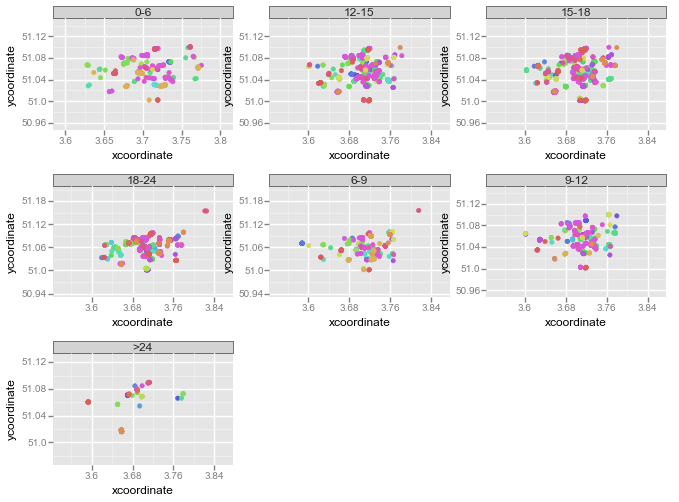

<ggplot: (8783242171529)>

In [12]:
ggplot(bomen_gent, aes(x='xcoordinate', y='ycoordinate', color='NaamNL')) +\
    geom_point() + facet_wrap("Boomhoogte")

In [13]:
import folium

In [14]:
from IPython.display import HTML
 
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))
 
def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))



In [15]:
bomen_gent_test = bomen_gent.dropna()

In [16]:
row = bomen_gent_test.iloc[0]

In [17]:
float(row["Stamdiamet"][:2])

30.0

In [18]:
lat = bomen_gent['ycoordinate'].mean()
lon = bomen_gent['xcoordinate'].mean()

fmap = folium.Map(location=[lat, lon], zoom_start=12)

def plotmarker(row):
    fmap.circle_marker([row['ycoordinate'], row['xcoordinate']],
                       popup=row['NaamNL'], fill_color="green",
                       line_color=None, radius=float(row["Stamdiamet"][:2])/2.,
                       fill_opacity=0.4)
    
bomen_gent_test.apply(plotmarker, axis=1)
inline_map(fmap)

## mplleaflet

Blijkbaar nog eenvoudiger met de library mplleaflet, https://github.com/jwass/mplleaflet.git

In [19]:
import mplleaflet

In [20]:
bomen_gent_test.head()

BoomID Boomcode Boomhoogte FID                   Naam          NaamNL  \
1     DEN971   FRAEXC      15-18   1     Fraxinus excelsior       gewone es   
2  ASTRID745   PLAACE      12-15   2  Platanus x acerifolia  gewone plataan   
3  ASTRID894   TILCOR      12-15   3          Tilia cordata     winterlinde   
4  ASTRID895   TILTOM      15-18   4        Tilia tomentosa     zilverlinde   
5  ASTRID750   PLAACE      12-15   5  Platanus x acerifolia  gewone plataan   

   Plantjaar Stamdiamet  xcoordinate  ycoordinate  
1       1980    30 - 35     3.680044    51.026843  
2       1920    90 - 95     3.735831    51.056299  
3       1960    45 - 50     3.736961    51.054390  
4       1960    50 - 55     3.736893    51.054449  
5       1920    90 - 95     3.736468    51.056370

In [21]:
# create just a matplotlib figure as usual
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(bomen_gent_test["xcoordinate"], bomen_gent_test["ycoordinate"], 'o', c='green')
# make a leaflet map of it:
mplleaflet.display(fig=ax.figure)

Naar mijn eerste indruk is het wel niet zo performant... Wel super dat het met 1 commando kan!